# Logistic regression


Recall in the session of basic statistics, we have the following diagram:

![](https://cdn.scribbr.com/wp-content/uploads//2020/01/flowchart-for-choosing-a-statistical-test.png)


Logistic regression is used in studies where the independent variables (IVs) are continuous, and the dependent variable (DV) is binary. Examples include:
	•	IV: Variable intensity (e.g., loudness, brightness); DV: Binary decision (Yes/No).
	•	Social binary decisions (e.g., Pass/Fail, Selected/Not-Selected), influenced by factors like age, education, and gender.
	•	Titanic survival prediction based on ticket class, gender, etc.

In summary, the logistic regression model estimates the probability of a specific outcome (e.g., P(Y=1)) as a function of input variables (X).

__Logistic Regression is also important for computational neuroscience__

Many neural networks implement the logistic function as the activation function. Machine learning classification algorithms used it to predict the probability of a categorical dependent variable. 



## Linear regression and Logistic regression

Recall that linear regression aims to find a relationship between the dependent variable  y  and the input  X  through a linear relationship. Mathematically, it is expressed as:

$$y = w_0 + w_1 x_1 + \dots + w_p x_p$$


Here:
- $w_0$  represents the intercept (a constant term),
- $w = (w_1, \dots, w_p)$  is a vector of coefficients (denoted as coef_ in some implementations).

On the other hand, logistic regression extends this concept to situations where  y  represents a log-likelihood ratio between two possible outcomes (e.g., Yes vs. No). The relationship is given by:


$$\log \frac{p}{1-p} = y = w^T X$$


Breaking it down:

1.	Log Odds Transformation: The left-hand side ( $\log \frac{p}{1-p}$ ) is the log-odds or log-likelihood ratio, which translates probabilities ( p ) into a continuous scale.
2.	Linear Relationship: The right-hand side ( $w^T X$ ) expresses the log-odds as a linear combination of the inputs ( $X$ ).

For a Single Independent Variable

When there is just one independent variable ( $X$ ) and one dependent variable ( $y$ ), the equation simplifies to:


$$\log \frac{p}{1-p} = w_0 + w_1 X$$


This can be rearranged to express  $p$  (the probability of the positive outcome) as:


$$p = \frac{1}{1 + e^{-(w_0 + w_1 X)}}$$


Interpretation:

1.	Sigmoid Function: The above equation represents the sigmoid function, which maps any linear input into a value between $0$ and $1$, making it ideal for probability estimation.
2.	Application: Logistic regression is widely used for classification problems, as it predicts the likelihood of an event occurring (e.g., predicting if a student will pass or fail based on their study hours).



## Logistic regression



### 1. the shape of logistic function

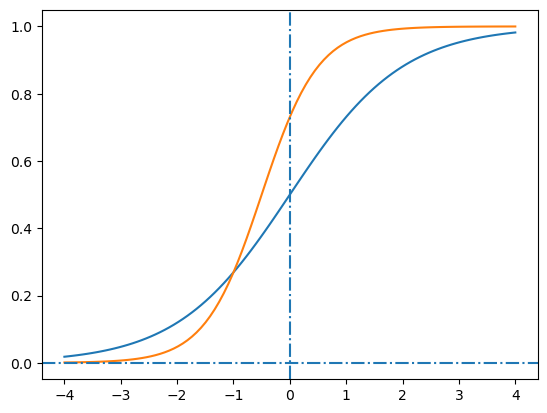

In [5]:
#1. Import relevant packages
import numpy as np  # for matrix and array
import pandas as pd # dealing with matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns # for visualization
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Let's take a look of a very simple logistic function
# it looks like a sigmoid curve!

w0 = [0, 1]
w1 = [1, 2]
x = np.linspace(-4,4,100 )
p1 = 1/(1+ np.exp(-w0[0] - w1[0]*x))
p2 = 1/(1+ np.exp(-w0[1] - w1[1]*x))
plt.plot(x,p1)
plt.plot(x,p2)
plt.axhline(linestyle = '-.')
plt.axvline(linestyle = '-.')

__Note__: From the above, we can see that $w_1$ controls the steepness of the logistic function, while $w_0$ controls the horizontal shifts. 

### A toy example
Let's look at a toy logistic model with the hypothetical dataset, adapted from [this tutorial](https://datatofish.com/logistic-regression-python/) [no longer exist].

In this example, we want to predict the admission to a prestigous university based on student's GMAT score, GPA, and years of work experience. The data look like below: 

In [3]:

#2. Provide data
# Here are hypothetical data
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
# from dictionary to a data table
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head(5) # show the first 10 rows

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1


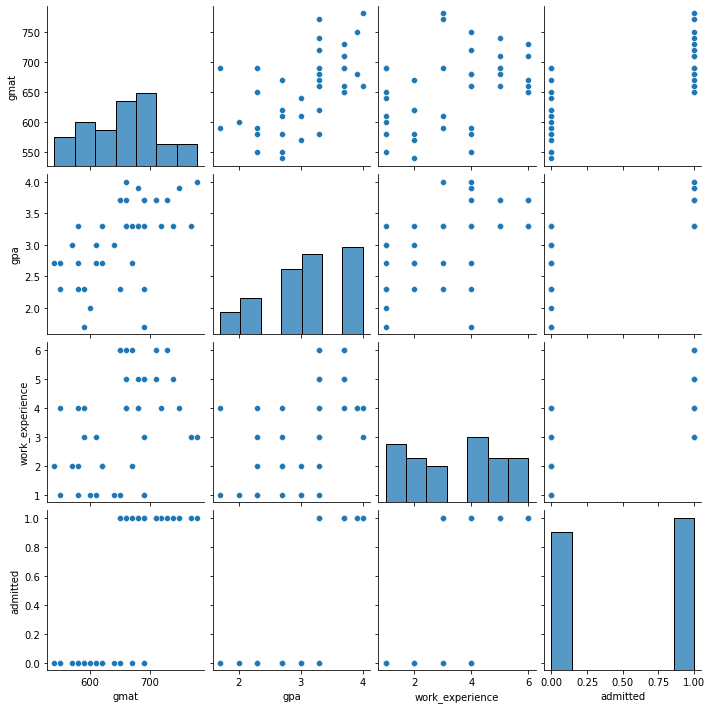

In [13]:
sns.pairplot(data = df)

__Approach 1__: using linear regression

If you want to use linear approach, you may first to transform your data into linear fashion. This approach is simpler when you have averaged data (mean of correct rate or admission rate etc.). 

For binary values [0, 1], there is no log-transformation, so you need to adjust the value first (not recommended). For the comparison and illustration, we adjust the dependent variable. 

In [4]:
df['adjusted'] = df.admitted.replace([0,1],[0.001,0.999])
df['ll'] = np.log(df.adjusted/(1-df.adjusted)) # log(p/(1-p))
df.head()

,gmat,gpa,work_experience,admitted,adjusted,ll
0,780,4.0,3,1,0.999,6.906755
1,750,3.9,4,1,0.999,6.906755
2,690,3.3,3,1,0.999,6.906755
3,710,3.7,5,1,0.999,6.906755
4,680,3.9,4,1,0.999,6.906755


Now we create a linear model on `ll`. 

In [5]:
# statsmodel approach
model = smf.ols(formula = 'll ~ gmat + gpa + work_experience', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ll   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           4.61e-18
Time:                        22:39:37   Log-Likelihood:                -87.947
No. Observations:                  40   AIC:                             183.9
Df Residuals:                      36   BIC:                             190.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -44.9289      4.046    -11.103      0.000     -53.135     -36.722
gmat                0.0417      0.007      5.725      0.000       0.027       0.056
gpa                 3.8703      0.801      4.833      0.000       2.246       5.494
work_experience     1.7554      0.263      6.671      0.000       1.222       2.289
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   2.350
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.455
Skew:                           0.070   Prob(JB):                        0.796
Kurtosis:                       2.496   Cond. No.                     7.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Approach 2__ Logistic regression (better approach)

* Statsmodel: `smf.logit(formula = , data = )`. 
* Pingouin: `pg.logistic_regression(X, y)`

In [6]:
# statsmodel approach
model3 =smf.logit(formula = 'admitted ~ gmat + gpa + work_experience', data = df).fit(method = 'bfgs')
model3.summary()

         Current function value: 0.000096
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40


/Users/strongway/miniconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:1397: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Users/strongway/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               admitted   No. Observations:                   40
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            3
Date:                Sat, 16 Nov 2024   Pseudo R-squ.:                  0.9999
Time:                        22:40:23   Log-Likelihood:             -0.0038316
converged:                      False   LL-Null:                       -27.676
Covariance Type:            nonrobust   LLR p-value:                 5.798e-12
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -173.9191   2340.933     -0.074      0.941   -4762.063    4414.225
gmat                0.1961      3.894      0.050      0.960      -7.436       7.828
gpa                 4.7868    349.048      0.014      0.989    -679.335     688.908
work_experience     9.4778    223.757      0.042      0.966    -429.078     448.033
===================================================================================

Possibly complete quasi-separation: A fraction 0.97 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

There are some small differences between two approaches, given that the estimation methods are different. 

Now, let's compared two different models:

* Linear model:

$$\log \frac{p}{1-p} = -44.929 + 0.0417 GMAT + 3.87 GPA + 1.7554 WX$$

* Logistic model:

$$p = \frac {1}{1 + e^{-(-173.91 + 0.196 GMAT + 4.787 GAP + 9.48 WX)}}$$
033


It looks quite different, but actually the predict curves are actually very similar. 

Let's visualize them. 

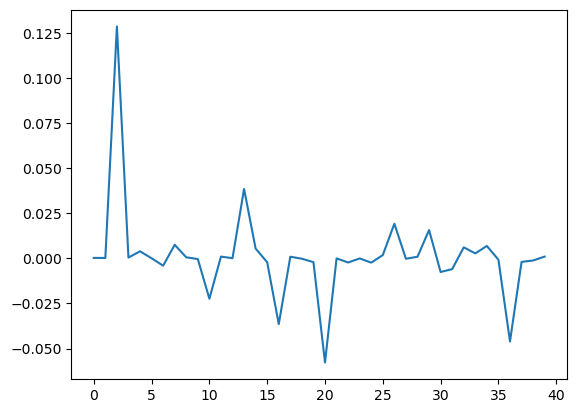

In [8]:
ll = -44.929 + 0.0417*df.gmat + 3.87 * df.gpa + 1.7554*df.work_experience
p1 = 1/(1+np.exp(-ll))
p2 = 1/(1 + np.exp(-(-173.91 + 0.196 *df.gmat + 4.787 * df.gpa + 9.48*df.work_experience)))
# visualize the error
plt.plot(p2-p1)
# the error mainly coming from adjusted values 0 --> 0.001, 1 --> 0.999

### A real example

Again, we use the example that we used in the previous session. 

**Paper**: 
Zhu, X., Baykan, C., Müller, H. J., & Shi, Z. (2021). Temporal bisection is influenced by ensemble statistics of the stimulus set. Attention, Perception & Psychophysics, 83(3), 1201–1214. https://doi.org/10.3758/s13414-020-02202-z

In this study we compare how ensemble statistics influence temporal bisection. We estimated the point of subjective equality (PSE) for each condition and use this PSE to judge if there are any significant changes in duration perception. I skip the detail design here and the estimation method (from logistic regression), and mainly focus on statistical tests. 

The results from Experiment 2 looks like this:

![](https://media.springernature.com/full/springer-static/image/art%3A10.3758%2Fs13414-020-02202-z/MediaObjects/13414_2020_2202_Fig3_HTML.png?as=webp) 


The raw data are available in my github [here](https://raw.githubusercontent.com/msenselab/sets_in_bisection/master/data/AllData_exp2.csv). 

In [9]:
# first - load data
bisection = pd.read_csv('https://raw.githubusercontent.com/msenselab/sets_in_bisection/master/data/AllData_exp2.csv')
bisection.head()
# Here the relevant columns are:
# curDur - the probe duration
# RP - Response
# cond - 1 or 2 Positive Skewed vs. Negative Skewed distribution
# NSub - subject ID

,Unnamed: 0,X,moda,durNo,cond,curDur,RP,NSub,NT,valid,NB
0,1,1,1,11,1,0.8,0,1,1,0,0
1,2,2,1,14,1,0.8,1,1,2,0,0
2,3,3,1,21,1,0.6,0,1,3,0,0
3,4,4,1,17,1,0.6,0,1,4,0,0
4,5,5,1,23,1,0.4,0,1,5,0,0


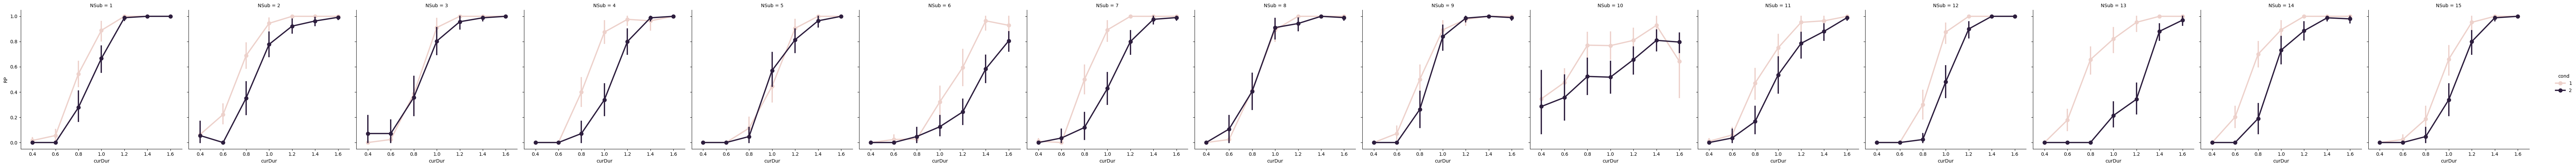

In [10]:
# quickly visualize the individual data
sns.catplot(data = bisection, kind = 'point', 
            x = 'curDur', y = 'RP', hue = 'cond', col = 'NSub')

For the illustration purpose, we only do estimation here for the group data. For full analysis, please check the source code in the Github repository. 

In [15]:
# we separate for two conditions
af = bisection.query('cond == 2') #ascending frequency
df = bisection.query('cond == 1') # descening frequency

# statsmodel approach
logit_af =smf.logit(formula = 'RP ~ curDur', data = af).fit()
logit_af.summary()


Optimization terminated successfully.
         Current function value: 0.347325
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     RP   No. Observations:                 6104
Model:                          Logit   Df Residuals:                     6102
Method:                           MLE   Df Model:                            1
Date:                Sat, 16 Nov 2024   Pseudo R-squ.:                  0.4397
Time:                        22:50:01   Log-Likelihood:                -2120.1
converged:                       True   LL-Null:                       -3783.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3962      0.178    -35.918      0.000      -6.745      -6.047
curDur         6.4398      0.162     39.847      0.000       6.123       6.757
==============================================================================
"""

In [16]:
logit_df =smf.logit(formula = 'RP ~ curDur', data = df).fit()
logit_df.summary()

Optimization terminated successfully.
         Current function value: 0.330959
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     RP   No. Observations:                 6104
Model:                          Logit   Df Residuals:                     6102
Method:                           MLE   Df Model:                            1
Date:                Sat, 16 Nov 2024   Pseudo R-squ.:                  0.5152
Time:                        22:50:25   Log-Likelihood:                -2020.2
converged:                       True   LL-Null:                       -4166.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.8937      0.167    -41.327      0.000      -7.221      -6.567
curDur         8.1976      0.202     40.585      0.000       7.802       8.593
==============================================================================
"""

In [19]:
logit_af.params

Intercept   -6.396153
curDur       6.439751
dtype: float64

We can estimate the threshold at $p=0.5$. Recall logistic function,
$$\log  \frac p {1-p} = w_0 + w_1X, $$

When $p=0.5$, the threshold X would be

$$X_{threshold} = - w_0/w_x$$

In [22]:
# so let's quickly calculate the mean PSEs. 
af_threshold = -logit_af.params['Intercept']/logit_af.params['curDur']
df_threshold = -logit_df.params['Intercept']/logit_df.params['curDur']
print([af_threshold, df_threshold])

[0.9932298131788642, 0.8409436659162522]


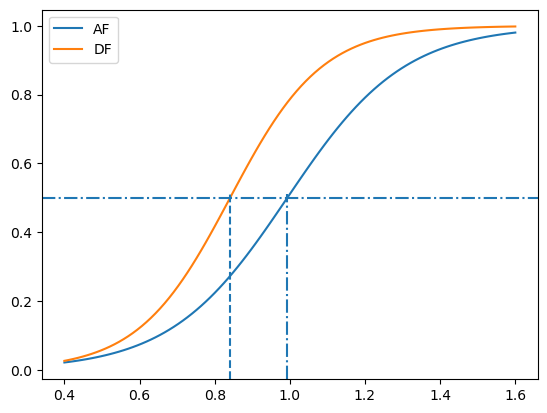

In [29]:
# visualize two conditions
Duration = np.linspace(0.4, 1.6, num = 100)
p_af = 1/(1+np.exp(-(logit_af.params['Intercept']+logit_af.params['curDur']*Duration)))
p_df = 1/(1+np.exp(-(logit_df.params['Intercept']+logit_df.params['curDur']*Duration)))
plt.plot(Duration, p_af)
plt.plot(Duration, p_df)
# add thresholds vertical lines at x = thresholds, y =[0, 0.5]
plt.axvline(af_threshold, ymin=0, ymax=0.5, linestyle = '-.')
plt.axvline(df_threshold, ymin=0, ymax=0.5, linestyle = '--')
# add horizontal line at y = 0.5
plt.axhline(0.5, linestyle = '-.')
plt.legend(['AF','DF'])

## Practice

In the following, we will use the `Psignifit` package to estimate the logistic regression.
[`Psignifit`](https://psignifit.readthedocs.io/en/latest/index.html) is a Python package for Bayesian estimation of psychometric functions. 

Psignifit expects that data provided by the user are organized into a m-row by 3-column numpy array, where m is the number of trials. The first column should contain the stimulus intensity, the second column should contain the number of correct responses, and the third column should contain the number of trials at each stimulus intensity ($[X, NCorrect, NTotal]$).


In [ ]:
# install BayesFit
!pip install psignifit

In [ ]:
import pandas as pd
import numpy as np
import psignifit as ps
from psignifit import psigniplot
import matplotlib.pyplot as plt
import seaborn as sns
# here is a basic example
#        levels, n-correct,   n-total
data = [[0.0010,   45.0000,   90.0000],
        [0.0015,   50.0000,   90.0000],
        [0.0020,   44.0000,   90.0000],
        [0.0025,   44.0000,   90.0000],
        [0.0030,   52.0000,   90.0000],
        [0.0035,   53.0000,   90.0000],
        [0.0040,   62.0000,   90.0000],
        [0.0045,   64.0000,   90.0000],
        [0.0050,   76.0000,   90.0000],
        [0.0060,   79.0000,   90.0000],
        [0.0070,   88.0000,   90.0000],
        [0.0080,   90.0000,   90.0000],
        [0.0100,   90.0000,   90.0000]]

# fitting a psycho-metric function
result = ps.psignifit(data, experiment_type='2AFC')

# print results parameters
print(result.parameter_estimate)

{'gamma': 0.5, 'eta': 0.00012925277952539202, 'lambda': 3.3448045998592124e-07, 'threshold': 0.004646442173983336, 'width': 0.004663151664263743}


The parameters estimated by psignifit are:

- `threshold`, the stimulus value of equal-odds
- `width`, the difference between the 5 and the 95 percentile of the unscaled sigmoid
- `lambda`, the lapse rate (upper asymptote of the sigmoid)
- `gamma`, the guess rate (lower asymptote of the sigmoid). This parameter is fixed for nAFC experiment types.
- `eta`,the overdispersion parameter. A value near zero indicates your data behaves binomially distributed, whereas values near one indicate severely overdispersed data.

<Axes: xlabel='Stimulus Level', ylabel='Proportion Correct'>

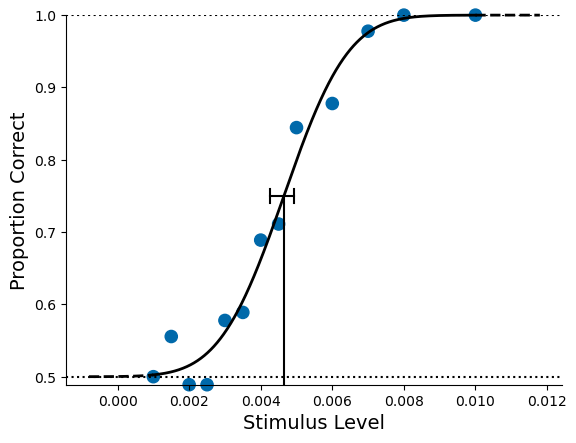

In [35]:
psigniplot.plot_psychometric_function(result)

In [36]:
# Now let's use the bisection data
bisection = pd.read_csv('https://raw.githubusercontent.com/msenselab/sets_in_bisection/master/data/AllData_exp2.csv')

bisection.head(5)

,Unnamed: 0,X,moda,durNo,cond,curDur,RP,NSub,NT,valid,NB
0,1,1,1,11,1,0.8,0,1,1,0,0
1,2,2,1,14,1,0.8,1,1,2,0,0
2,3,3,1,21,1,0.6,0,1,3,0,0
3,4,4,1,17,1,0.6,0,1,4,0,0
4,5,5,1,23,1,0.4,0,1,5,0,0


In [ ]:
# we prepare data for bayesfit (curDur, sum(RP), N) for each subject, condition
# FIXME: not runable - need to replace FIXME with the correct column names
sum_data = bisection.groupby(['NSub',FIXME,FIXME]).agg({'RP': ['sum', 'count']}).reset_index()
sum_data.columns = ['subj','context','duration','Resp','N']
# change the context to 1, 2 to 'Decending' and 'Ascending'
sum_data['context'] = sum_data.context.replace([1,2],['Decending','Ascending'])
sum_data.head(10)

,subj,context,duration,Resp,N
0,1,Decending,0.4,2,126
1,1,Decending,0.6,6,108
2,1,Decending,0.8,49,90
3,1,Decending,1.0,64,72
4,1,Decending,1.2,54,54
5,1,Decending,1.4,36,36
6,1,Decending,1.6,18,18
7,1,Ascending,0.4,0,18
8,1,Ascending,0.6,0,36
9,1,Ascending,0.8,15,54


Next, we use the `psignifit` package to estimate the logistic regression. 
we use the configuration to indicate we want to use the logistic regression, and the response type is yes/no. 

```python
# initialize the config dictionary
config = {
    'sigmoid': 'logistic',
    'experiment_type': 'yes/no'
}
```

In [ ]:
# Step 1: Prepare the data for each subject and context
thresholds_df = []
# initialize the config dictionary
config = {
    'sigmoid': 'logistic',
    'experiment_type': 'yes/no' # short / long
}
for (subj, context), group in sum_data.groupby(['subj', 'context']):
    # Extract the necessary columns for bayesfit: duration, Resp, and N
    # Fixme
    data = group[FIXME].to_numpy()
    
    res = ps.psignifit(data, **config)
    # Extract the threshold value
    threshold = res.parameter_estimate['threshold']
    thresholds_df.append({'subj':subj, 'context':context, 'threshold':threshold})

# convert the list of dictionaries to a data frame
thresholds_df = pd.DataFrame(thresholds_df)
thresholds_df.head()

,subj,context,threshold
0,1,Ascending,0.913571
1,1,Decending,0.802505
2,2,Ascending,0.875113
3,2,Decending,0.730375
4,3,Ascending,0.864628


<Axes: xlabel='Stimulus Level', ylabel='Proportion Correct'>

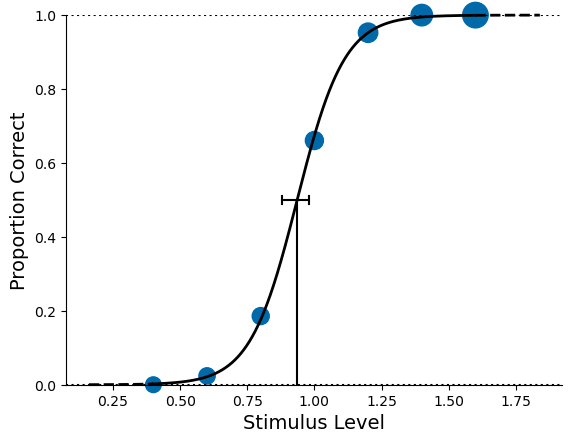

In [41]:
# let's plot the last case
psigniplot.plot_psychometric_function(res)

<Axes: xlabel='context', ylabel='threshold'>

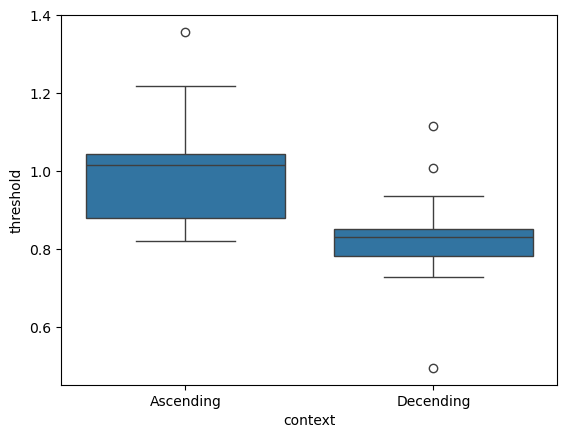

In [43]:
# We use seaborn to visualize the mean thresholds for two contexts using boxplot
sns.boxplot(data = thresholds_df, x = 'context', y = 'threshold')

Now let's estimate and visualize the average data. 

In [44]:
avg = bisection.groupby(['cond','curDur']).agg({'RP': ['sum', 'count']}).reset_index()
avg.columns = ['context','duration','Resp','N']
avg.head(10)

,context,duration,Resp,N
0,1,0.4,46,1526
1,1,0.6,121,1308
2,1,0.8,491,1090
3,1,1.0,692,872
4,1,1.2,617,654
5,1,1.4,431,436
6,1,1.6,212,218
7,2,0.4,6,218
8,2,0.6,17,436
9,2,0.8,129,654


In [ ]:
#we have two contexts, we need to separate them using query
df = avg.query('context == 1')[['duration','Resp','N']].to_numpy()
af = avg.query('context == 2')[['duration','Resp','N']].to_numpy()

# fit psychometric function for each context
res_df = FIXME
res_af = FIXME


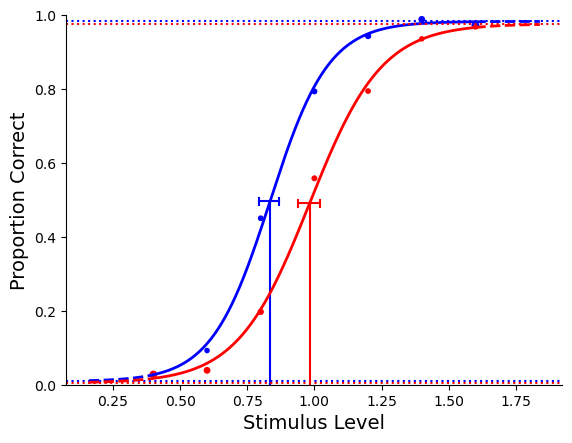

In [49]:

# plot the psychometric function
plt.figure()
psigniplot.plot_psychometric_function(res_df, data_color = 'blue', line_color = 'blue')
psigniplot.plot_psychometric_function(res_af, data_color = 'red', line_color = 'red')
plt.show()

# Activation function in Artificial Neural Network (ANN)

The basic neural networks will be given in the next session. Here we only show the application of logistic regression to the network. 

Activation function of a node defines the output of that node based on the input to the node. 

![ANN](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/440px-Artificial_neural_network.svg.png)




## Linear activation
If the summation of inputs is simply pass through the note with some linear gating (i.e., linear transformation), this would be a linear activation. 

$$A(X) = w_0 + w\cdot X$$

## Step activation

If the node is only activate when the summation passes a certain threshold, this activation is a step activation. This mimick neuron firing (binary states: firing, not firing). A typical step-function activation is used in Perceptron (details in next week). 

The perceptron is a simple feedforward network. An input vector $x$ with their weights $w$ to an output 'neuron'. When the summation is greater than a threshold $\theta$, it fires (1), otherwise, it is silent (0). 

$$a(x) = 1, \text{ if wx} \gt \theta$$
$$a(x) = 0, \text { otherwise}$$

## Logistic activation
The step activation looks at the single neuron level with two states. When we characterize neuron firing from a group of neuron, we can obtain the firing rate. The firing rate increases when the inputs increase, but the firing rate cannot exceed a certain rate, which motivates the usage of sigmoid function, such as logistic function. 

## ReLU activation

There is another popular activation function is the rectified linear unit (ReLU) activation function, which enables better training of deeper networks. 

ReLU function is basically the positive part of the input:

$$A(x) = x^+ = max(0, x)$$. 


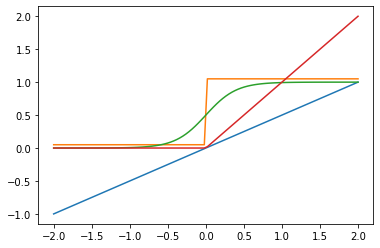

In [77]:
# illustration of different activation functions
x = np.linspace(-2,2,100)
a_linear = x.copy()/2
a_step = (np.sign(x) + 1.1)/2 # make visible in the overlapped part
a_logit = 1/(1+np.exp(-5*x))
a_relu = x.copy()
a_relu[a_relu<0]=0
plt.plot(x,a_linear)
plt.plot(x,a_step)
plt.plot(x, a_logit)
plt.plot(x, a_relu)